# Historical Stock Price Returns | Distribution

### Polygon: https://polygon.io/dashboard

In [1]:
import pandas as pd
from pandas_gbq import to_gbq
import numpy as np
import matplotlib as mpb
import matplotlib.pyplot as plt

import itertools

In [2]:
# Google BigQuery Authentication

from google.cloud import bigquery
from google_auth_oauthlib.flow import InstalledAppFlow
from google.auth.transport.requests import Request
import os
import pickle

# Set your OAuth client ID JSON downloaded from GCP Console
# CLIENT_SECRET_FILE = 'client_secret.json'  # downloaded from GCP
CLIENT_SECRET_FILE = os.path.expanduser("/Users/ryanrunchey/credentials/gcp_credentials/client_secret_295707256455-0fsr3bqoc89psl22fgp2cfipbd4m1s1v.apps.googleusercontent.com.json")
SCOPES = ['https://www.googleapis.com/auth/cloud-platform']

# Authenticate interactively (stores a token locally for reuse)
if os.path.exists('token.pickle'):
    with open('token.pickle', 'rb') as token:
        credentials = pickle.load(token)
else:
    flow = InstalledAppFlow.from_client_secrets_file(CLIENT_SECRET_FILE, SCOPES)
    credentials = flow.run_local_server(port=0)
    with open('token.pickle', 'wb') as token:
        pickle.dump(credentials, token)

# Initialize the BigQuery client with those credentials
client = bigquery.Client(credentials=credentials, project="ryanrunchey")

In [3]:
from google.cloud import bigquery
from google_auth_oauthlib.flow import InstalledAppFlow
from google.auth.transport.requests import Request
import os
import pickle

# Path to your client secret JSON
CLIENT_SECRET_FILE = os.path.expanduser(
    "/Users/ryanrunchey/credentials/gcp_credentials/client_secret_295707256455-0fsr3bqoc89psl22fgp2cfipbd4m1s1v.apps.googleusercontent.com.json"
)
SCOPES = ['https://www.googleapis.com/auth/cloud-platform']
TOKEN_FILE = 'token.pickle'

credentials = None

# Load credentials if token.pickle exists
if os.path.exists(TOKEN_FILE):
    with open(TOKEN_FILE, 'rb') as token:
        credentials = pickle.load(token)

# Refresh or re-authenticate if necessary
if not credentials or not credentials.valid:
    try:
        if credentials and credentials.expired and credentials.refresh_token:
            credentials.refresh(Request())
        else:
            raise Exception("Token invalid or missing")
    except Exception:
        # Force fresh login if refresh fails
        print("🔁 Starting fresh authentication flow...")
        flow = InstalledAppFlow.from_client_secrets_file(CLIENT_SECRET_FILE, SCOPES)
        credentials = flow.run_local_server(port=0)
        with open(TOKEN_FILE, 'wb') as token:
            pickle.dump(credentials, token)

# Initialize BigQuery client
client = bigquery.Client(credentials=credentials, project="ryanrunchey")

In [4]:
# Import stock price returns data
query = "SELECT * FROM historical_stock_price_returns.polygon_stock_price_returns_851_trading_days"
df_stock_price_returns = client.query(query).to_dataframe()
df_stock_price_returns.head()

,exchange,symbol,start_date,start_close,end_date,end_close,price_difference,roi_pct
0,XASE,AAC,2003-09-17,122.40,2006-01-17,81.60,-40.80,-0.333333
1,XASE,ABL,2003-09-17,6.80,2006-01-17,9.30,2.50,0.367647
2,XASE,ABP,2003-09-17,0.99,2006-01-17,6.18,5.19,5.242424
3,XASE,ACU,2003-09-17,5.49,2006-01-17,13.02,7.53,1.371585
4,XASE,ACY,2003-09-17,3.50,2006-01-17,3.29,-0.21,-0.060000


In [5]:
df_stock_price_returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37664 entries, 0 to 37663
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   exchange          37664 non-null  object        
 1   symbol            37664 non-null  object        
 2   start_date        37664 non-null  datetime64[us]
 3   start_close       37664 non-null  float64       
 4   end_date          26095 non-null  datetime64[us]
 5   end_close         26095 non-null  float64       
 6   price_difference  26095 non-null  float64       
 7   roi_pct           26095 non-null  float64       
dtypes: datetime64[us](2), float64(4), object(2)
memory usage: 2.3+ MB


In [6]:
df_stock_price_returns['start_date'].min(), df_stock_price_returns['start_date'].max()

(Timestamp('2003-09-17 00:00:00'), Timestamp('2021-09-16 00:00:00'))

### Validate Data

In [7]:
portfolio_stocks = ['AEZS', 'ATHX', 'CYCN', 'IBIO', 'IDEX', 'JAGX', 'LPCN', 'NAK', 'NMTR', 'NXTD', 'PLX', 'SESN', 'TXMD', 'TYME', 'UAMY', 'WTRH']

In [8]:
mask = (df_stock_price_returns['symbol'].isin(portfolio_stocks)) & (df_stock_price_returns['start_date'] == '2021-09-16')
df_stock_price_returns[mask].sort_values('symbol').head(25)

,exchange,symbol,start_date,start_close,end_date,end_close,price_difference,roi_pct
27945,XNAS,AEZS,2021-09-16,61.4300,2024-01-16,7.8400,-53.5900,-0.872375
36224,XNAS,ATHX,2021-09-16,37.2500,NaT,NaN,NaN,NaN
28638,XNAS,CYCN,2021-09-16,62.0000,2024-01-16,3.8300,-58.1700,-0.938226
6589,XASE,IBIO,2021-09-16,580.0000,2024-01-16,1.1400,-578.8600,-0.998034
29302,XNAS,IDEX,2021-09-16,273.7500,2024-01-16,1.5500,-272.2000,-0.994338
29427,XNAS,JAGX,2021-09-16,266625.0000,2024-01-16,142.9500,-266482.0500,-0.999464
29602,XNAS,LPCN,2021-09-16,19.3800,2024-01-16,4.1100,-15.2700,-0.787926
6623,XASE,NAK,2021-09-16,0.4820,2024-01-16,0.2650,-0.2170,-0.450207
37116,XNAS,NMTR,2021-09-16,26.0000,NaT,NaN,NaN,NaN
37133,XNAS,NXTD,2021-09-16,0.4129,NaT,NaN,NaN,NaN


In [9]:
print(str(len(portfolio_stocks)) + " : # of stocks in the portfolio")
print(str(len(df_stock_price_returns[mask]['symbol'].unique())) + " : # of stocks in the starting dataset")
print(str(int(df_stock_price_returns[mask]['end_close'].notna().sum())) + " : # of stocks in the ending dataset")

16 : # of stocks in the portfolio
16 : # of stocks in the starting dataset
10 : # of stocks in the ending dataset


In [10]:
mask = (df_stock_price_returns['symbol'].isin(portfolio_stocks)) & (df_stock_price_returns['start_date'] == '2021-09-16') & (df_stock_price_returns['end_close'].isnull())
df_stock_price_returns[mask] \
    .groupby('symbol')['start_date'] \
    .agg(min_date='min', max_date='max') \
    .reset_index()

,symbol,min_date,max_date
0,ATHX,2021-09-16,2021-09-16
1,NMTR,2021-09-16,2021-09-16
2,NXTD,2021-09-16,2021-09-16
3,SESN,2021-09-16,2021-09-16
4,TYME,2021-09-16,2021-09-16
5,WTRH,2021-09-16,2021-09-16


### Check stock trading days in week

In [11]:
def get_dates_in_week(df, date_column, week_start_str, week_end_str):
    """
    Get all distinct dates from a DataFrame that fall within a specific week.
    
    Parameters:
        df (pd.DataFrame): Your DataFrame with a date column.
        date_column (str): Name of the date column.
        week_start_str (str): Start of the week, e.g. '2015-09-14'.
        week_end_str (str): End of the week, e.g. '2015-09-20'.
    
    Returns:
        pd.Series: Sorted list of distinct dates within the specified week.
    """
    # Ensure datetime format
    df = df.copy()
    df[date_column] = pd.to_datetime(df[date_column])

    # Filter by date range
    mask = (df[date_column] >= week_start_str) & (df[date_column] <= week_end_str)
    filtered_dates = df.loc[mask, date_column].drop_duplicates().sort_values()
    
    return filtered_dates.reset_index(drop=True)

In [12]:
get_dates_in_week(df_stock_price_returns, 'start_date', '2003-09-01', '2003-09-28')

0   2003-09-17
Name: start_date, dtype: datetime64[us]

### Filter to the first trading date on or after 9/14 of each year with a price ("close_end") 851 days later

In [13]:
# The first date that 2.5 years LEAPs were available to trade each year

# Import stock price dates
query = "SELECT * FROM historical_stock_price_returns.historical_stock_dates"
df_list_dates = client.query(query).to_dataframe()
df_list_dates = df_list_dates.apply(pd.to_datetime)
df_list_dates

,start_date,end_date
0,2002-09-18,2005-01-18
1,2003-09-17,2006-01-17
2,2004-09-15,2007-01-16
3,2005-09-16,2008-01-15
4,2006-09-15,2009-01-13
5,2007-09-14,2010-01-12
6,2008-09-17,2011-01-18
7,2009-09-16,2012-01-17
8,2010-09-15,2013-01-14
9,2011-09-16,2014-01-14


In [14]:
df_list_dates = df_list_dates[df_list_dates['start_date'] != '2002-09-18']
df_list_dates

,start_date,end_date
1,2003-09-17,2006-01-17
2,2004-09-15,2007-01-16
3,2005-09-16,2008-01-15
4,2006-09-15,2009-01-13
5,2007-09-14,2010-01-12
6,2008-09-17,2011-01-18
7,2009-09-16,2012-01-17
8,2010-09-15,2013-01-14
9,2011-09-16,2014-01-14
10,2012-09-14,2015-01-13


In [15]:
df_list_dates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 1 to 19
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   start_date  19 non-null     datetime64[ns]
 1   end_date    19 non-null     datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 456.0 bytes


In [16]:
pd_list_dates = df_list_dates['start_date']  # ensure correct dtype

In [17]:
# Identify NaN close_end per date

# Total rows per date
mask = df_stock_price_returns['start_date'].isin(pd_list_dates)
total_counts = df_stock_price_returns[mask].groupby('start_date').size().rename('total_count')

# NaN close_end rows per date
mask = (df_stock_price_returns['start_date'].isin(pd_list_dates)) & (df_stock_price_returns['end_close'].isna())
nan_counts = df_stock_price_returns[mask] \
    .groupby('start_date') \
    .size() \
    .rename('nan_count')

# Combine into one DataFrame
result = pd.concat([total_counts, nan_counts], axis=1).fillna(0)

# Ensure counts are integers
result['nan_count'] = result['nan_count'].astype(int)
result['total_count'] = result['total_count'].astype(int)

# Compute percentage
result['nan_pct'] = result['nan_count'] / result['total_count']

# Reset index for a clean DataFrame
result = result.reset_index()

print("Total NaN Count: " + str(result['nan_count'].sum()))
print()
result

Total NaN Count: 11569



,start_date,total_count,nan_count,nan_pct
0,2003-09-17,919,298,0.324266
1,2004-09-15,951,326,0.342797
2,2005-09-16,1043,412,0.395014
3,2006-09-15,1048,641,0.611641
4,2007-09-14,1243,829,0.666935
5,2008-09-17,1374,978,0.711790
6,2009-09-16,589,217,0.368421
7,2010-09-15,863,476,0.551564
8,2011-09-16,575,246,0.427826
9,2012-09-14,529,143,0.270321


# Charts

In [18]:
# Truncate all returns greater than 1 to the value 1.1 for histogram binning purposes

def gains_limit(x):
    if x > 2:
        return 2.1
    else:
        return x

In [19]:
# Select one example data series

mask = (df_stock_price_returns['start_date'] == '2021-09-16') & (df_stock_price_returns['start_close'] <= 1.25)
data = df_stock_price_returns[mask]['roi_pct']

# account for stock tickers that don't have a close_end price. tbd the root cause: merger, bankruptcy, delisting, etc.
# conservative approach: treat as if they all were a complete loss meaning the stock price went to $0
data = data.fillna(-1)

data.describe()

count    388.000000
mean      -0.898167
std        0.416530
min       -1.000000
25%       -1.000000
50%       -1.000000
75%       -1.000000
max        3.373178
Name: roi_pct, dtype: float64

In [20]:
data_gains_limit = data.map(gains_limit)
data_gains_limit.describe()

count    388.000000
mean      -0.904362
std        0.359667
min       -1.000000
25%       -1.000000
50%       -1.000000
75%       -1.000000
max        2.100000
Name: roi_pct, dtype: float64

## PDF and CDF

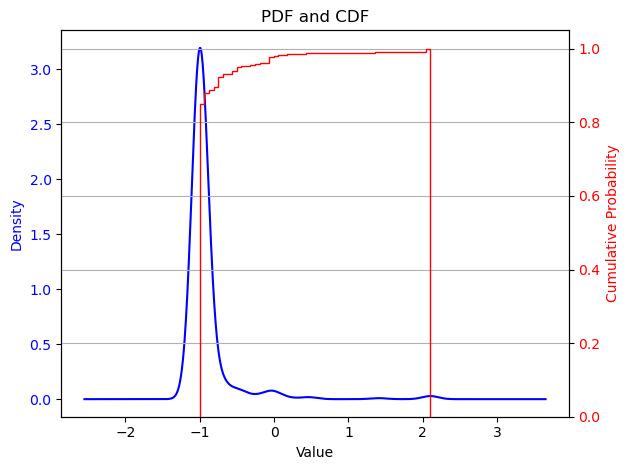

In [21]:
# Plot the PDF and CDF

fig, ax1 = plt.subplots()

# Plot PDF on the first y-axis
data_gains_limit.plot.density(ax=ax1, label='PDF (KDE)', color='blue')
ax1.set_xlabel('Value')
ax1.set_ylabel('Density', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for CDF
ax2 = ax1.twinx()
data_gains_limit.hist(cumulative=True, density=True, bins=50, ax=ax2, label='CDF', histtype='step', color='red')
ax2.set_ylabel('Cumulative Probability', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('PDF and CDF')
fig.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

## Histogram

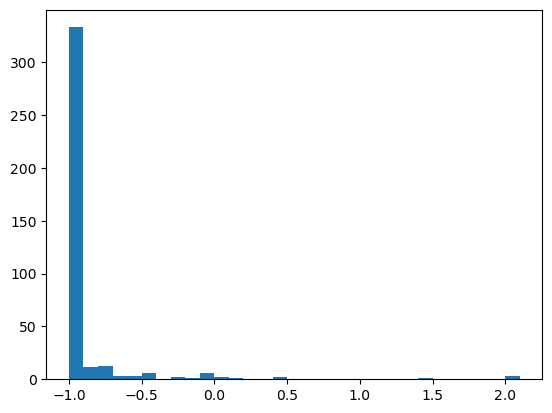

In [22]:
plt.hist(data_gains_limit, bins=31, range=(-1, 2.1));

In [23]:
data_gains_limit.describe()

count    388.000000
mean      -0.904362
std        0.359667
min       -1.000000
25%       -1.000000
50%       -1.000000
75%       -1.000000
max        2.100000
Name: roi_pct, dtype: float64

In [24]:
prob_neg_one = (data_gains_limit == -1).mean()
print(f"P(return = -1) = {prob_neg_one:.2%}")

P(return = -1) = 79.64%


In [25]:
data = np.histogram(data_gains_limit, bins=21, range=(-1, 1.1))

d = {'bins': data[1], 'counts': np.append(data[0], np.nan)}
df_hist = pd.DataFrame(data=d)
df_hist['cum_sum'] = df_hist.sort_values('bins', ascending=False).counts.cumsum()
df_hist['pct_cum_sum'] = df_hist['cum_sum'] / df_hist['counts'].sum()
df_hist

,bins,counts,cum_sum,pct_cum_sum
0,-1.0,333.0,384.0,1.000000
1,-0.9,12.0,51.0,0.132812
2,-0.8,13.0,39.0,0.101562
3,-0.7,3.0,26.0,0.067708
4,-0.6,3.0,23.0,0.059896
5,-0.5,6.0,20.0,0.052083
6,-0.4,0.0,14.0,0.036458
7,-0.3,2.0,14.0,0.036458
8,-0.2,1.0,12.0,0.031250
9,-0.1,6.0,11.0,0.028646


## Histogram Charts

In [26]:
df_list = []

exchange = 'XNAS'
# 'AMEX':'XASE, 'NASDAQ':'XNAS'

for date in pd_list_dates:
    mask = ((df_stock_price_returns['exchange'] == exchange) & \
            (df_stock_price_returns['start_date'] == date) & \
            (df_stock_price_returns['start_close'] <= 1.25))
    x = df_stock_price_returns[mask]['roi_pct'].map(gains_limit)

    # account for stock tickers that don't have a close_end price. tbd the root cause: merger, bankruptcy, delisting, etc.
    # conservative approach: treat as if they all were a complete loss meaning the stock price went to $0
    x = x.fillna(-1)

    data = np.histogram(x, bins=31, range=(-1, 2.1))

    d = {'start_date': list(itertools.repeat(date, 32)), 'bins': data[1], 'counts': np.append(data[0], np.nan)}
    df_hist = pd.DataFrame(data=d)
    df_hist['cum_sum'] = df_hist.sort_values('bins', ascending=False).counts.cumsum()
    df_hist['pct_cum_sum'] = df_hist['cum_sum'] / df_hist['counts'].sum()
    
    df_list.append(df_hist)

df_histograms = pd.concat(df_list)
df_histograms.tail(50)

,start_date,bins,counts,cum_sum,pct_cum_sum
14,2020-09-16,0.4,0.0,28.0,0.145833
15,2020-09-16,0.5,1.0,28.0,0.145833
16,2020-09-16,0.6,1.0,27.0,0.140625
17,2020-09-16,0.7,2.0,26.0,0.135417
18,2020-09-16,0.8,2.0,24.0,0.125000
19,2020-09-16,0.9,0.0,22.0,0.114583
20,2020-09-16,1.0,1.0,22.0,0.114583
21,2020-09-16,1.1,0.0,21.0,0.109375
22,2020-09-16,1.2,1.0,21.0,0.109375
23,2020-09-16,1.3,1.0,20.0,0.104167


In [27]:
# Export to csv
df_histograms.to_csv("df_histograms_less_than_1_25_" + exchange + ".csv")

# Export to pickle
df_histograms.to_pickle("df_histograms_less_than_1_25_" + exchange + ".pkl")

# Export to BigQuery
to_gbq(
    dataframe=df_histograms,
    destination_table="historical_stock_price_returns.df_histograms_less_than_1_25_" + exchange,
    project_id="ryanrunchey",
    if_exists="replace"  # or "append"
)

100%|██████████| 1/1 [00:00<00:00, 9686.61it/s]


In [28]:
# sample size per year
df_histograms.groupby(['start_date']).agg({'counts': 'sum'})

,counts
start_date,
2003-09-17,0.0
2004-09-15,0.0
2005-09-16,0.0
2006-09-15,0.0
2007-09-14,0.0
2008-09-17,0.0
2009-09-16,0.0
2010-09-15,10.0
2011-09-16,1.0


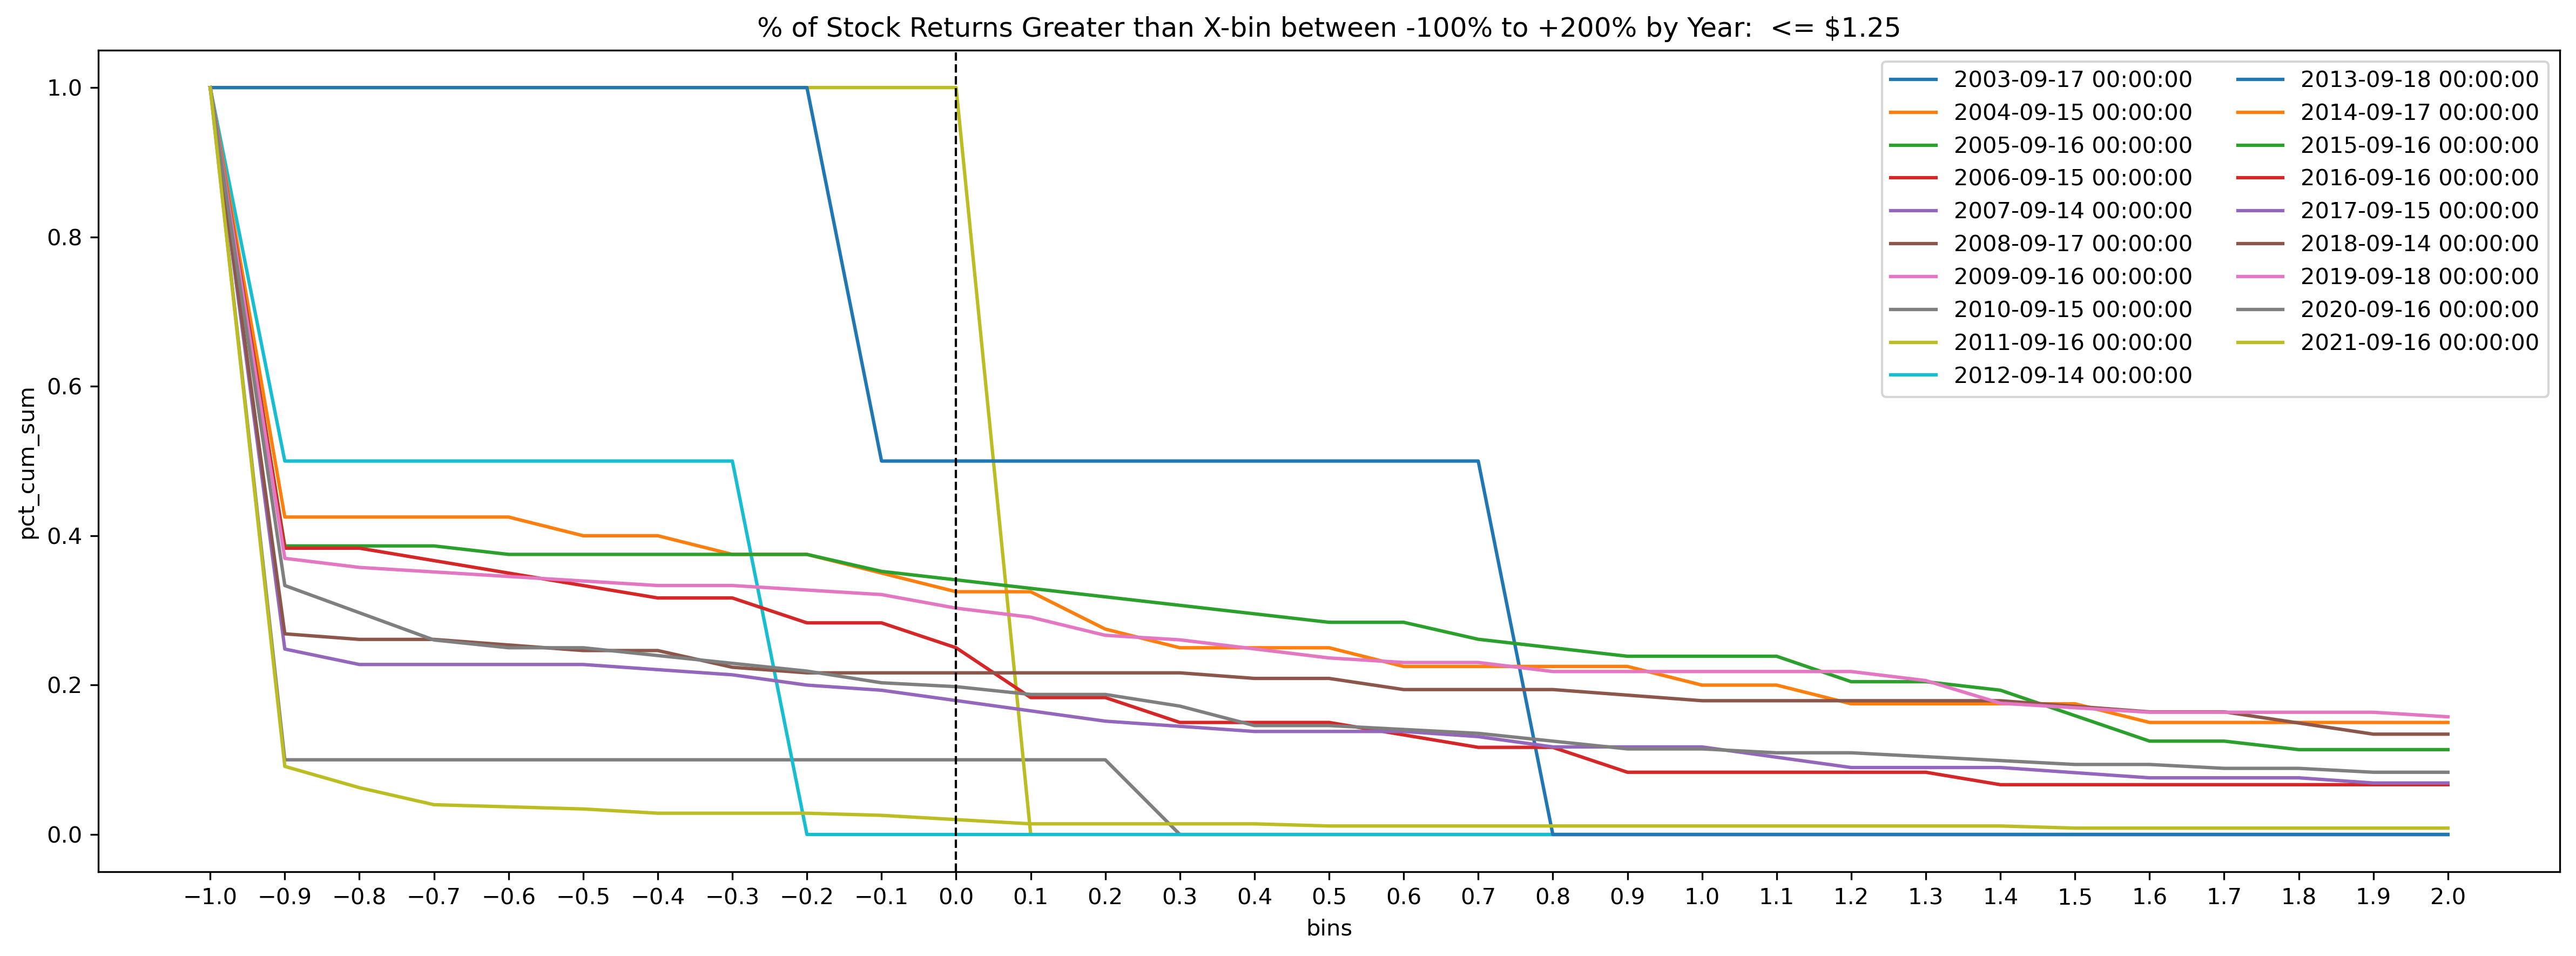

In [29]:
# Plot the histogram of each year's returns

plt.figure(figsize=(16, 6), dpi=300);
for d in pd_list_dates:
    mask = (df_histograms['start_date'] == d)
    plt.plot('bins', 'pct_cum_sum', data=df_histograms[mask], label=d);

plt.title('% of Stock Returns Greater than X-bin between -100% to +200% by Year: ' + ' <= $1.25') # + exchange 
plt.ylabel('pct_cum_sum')
plt.xlabel('bins')
plt.xticks(ticks=[i/10 for i in range(-10, 21, 1)])
plt.legend(ncol=2, loc='upper right')

# 👉 Add vertical dashed line at x = 0.0
plt.axvline(x=0.0, color='black', linestyle='--', linewidth=1)

plt.tight_layout()

# plt.savefig('chart_histograms_less_than_3_' + exchange + date_range + '.png', dpi='figure', bbox_inches=None, pad_inches=0.1,
            # facecolor='auto', edgecolor='auto');

## Aggregate of Histograms

In [30]:
df_histograms_agg = df_histograms.groupby(['bins']).agg({'counts': ['min', 'max', 'mean', 'median'], \
                                                         'pct_cum_sum': ['min', 'max', 'mean', 'median']})
df_histograms_agg

counts                          pct_cum_sum                              
        min    max       mean median         min       max      mean    median
bins                                                                          
-1.0    0.0  319.0  46.421053    1.0    1.000000  1.000000  1.000000  1.000000
-0.9    0.0   10.0   1.210526    0.0    0.091168  1.000000  0.425486  0.376515
-0.8    0.0    8.0   0.894737    0.0    0.062678  1.000000  0.416717  0.370455
-0.7    0.0    2.0   0.368421    0.0    0.039886  1.000000  0.409886  0.359091
-0.6    0.0    1.0   0.263158    0.0    0.037037  1.000000  0.405317  0.347727
-0.5    0.0    2.0   0.368421    0.0    0.034188  1.000000  0.400481  0.336364
-0.4    0.0    3.0   0.368421    0.0    0.028490  1.000000  0.396669  0.325000
-0.3    0.0    2.0   0.473684    0.0    0.028490  1.000000  0.391278  0.325000
-0.2    0.0    3.0   0.526316    0.0    0.000000  1.000000  0.343689  0.251042
-0.1    0.0    3.0   0.631579    0.0    0.000000  1.000000  0.295425  0.249876
 0.0    0.0    4.0   0.736842    0.0    0.000000  1.000000  0.286044  0.233209
 0.1    0.0    4.0   0.473684    0.0    0.000000  0.500000  0.192706  0.185417
 0.2    0.0    3.0   0.526316    0.0    0.000000  0.500000  0.184422  0.185417
 0.3    0.0    5.0   0.526316    0.0    0.000000  0.500000  0.167899  0.160938
 0.4    0.0    2.0   0.210526    0.0    0.000000  0.500000  0.162575  0.147917
 0.5    0.0    2.0   0.315789    0.0    0.000000  0.500000  0.160381  0.147917
 0.6    0.0    2.0   0.263158    0.0    0.000000  0.500000  0.154726  0.139278
 0.7    0.0    2.0   0.421053    0.0    0.000000  0.500000  0.150434  0.133226
 0.8    0.0    2.0   0.315789    0.0    0.000000  0.250000  0.104793  0.116954
 0.9    0.0    1.0   0.105263    0.0    0.000000  0.238636  0.099578  0.098958
 1.0    0.0    2.0   0.157895    0.0    0.000000  0.238636  0.096873  0.098958
 1.1    0.0    3.0   0.315789    0.0    0.000000  0.238636  0.095290  0.093391
 1.2    0.0    2.0   0.157895    0.0    0.000000  0.218182  0.089216  0.086494
 1.3    0.0    5.0   0.421053    0.0    0.000000  0.206061  0.087772  0.086494
 1.4    0.0    3.0   0.421053    0.0    0.000000  0.193182  0.082477  0.078161
 1.5    0.0    3.0   0.368421    0.0    0.000000  0.175000  0.077263  0.074713
 1.6    0.0    1.0   0.052632    0.0    0.000000  0.164179  0.070637  0.071264
 1.7    0.0    2.0   0.157895    0.0    0.000000  0.164179  0.070203  0.071264
 1.8    0.0    2.0   0.210526    0.0    0.000000  0.163636  0.068012  0.071264
 1.9    0.0    1.0   0.052632    0.0    0.000000  0.163636  0.065759  0.067816
 2.0    0.0   26.0   4.894737    0.0    0.000000  0.157576  0.065254  0.067816
 2.1    NaN    NaN        NaN    NaN         NaN       NaN       NaN       NaN

In [31]:
df_histograms_agg.to_csv("df_histograms_agg_less_than_1_25_" + exchange + ".csv")

# Simulate Portfolio Returns

In [32]:
data_positions = [
    {"equity_exchange": "NASDAQ", "equity_symbol": "AEZS pre-split", "option_strike": 0.5, "avg_price_stock": 0.57, "avg_price_option": 0.42, "avg_price": 0.16, "total_order": 4288.10, "downside_to_break_even": -0.73, "pct_of_strike": 0.31, "pct_of_share_price": 0.27},
    {"equity_exchange": "AMEX", "equity_symbol": "IBIO pre-split", "option_strike": 0.5, "avg_price_stock": 0.47, "avg_price_option": 0.34, "avg_price": 0.13, "total_order": 11137.21, "downside_to_break_even": -0.72, "pct_of_strike": 0.27, "pct_of_share_price": 0.28},
    {"equity_exchange": "NASDAQ", "equity_symbol": "LPCN", "option_strike": 0.5, "avg_price_stock": 1.14, "avg_price_option": 0.97, "avg_price": 0.16, "total_order": 32.34, "downside_to_break_even": -0.86, "pct_of_strike": 0.32, "pct_of_share_price": 0.14},
    {"equity_exchange": "AMEX", "equity_symbol": "NAK", "option_strike": 0.5, "avg_price_stock": 0.44, "avg_price_option": 0.30, "avg_price": 0.14, "total_order": 12534.25, "downside_to_break_even": -0.69, "pct_of_strike": 0.28, "pct_of_share_price": 0.31},
    {"equity_exchange": "NASDAQ", "equity_symbol": "NMTR pre-split", "option_strike": 0.5, "avg_price_stock": 0.81, "avg_price_option": 0.66, "avg_price": 0.15, "total_order": 17952.00, "downside_to_break_even": -0.82, "pct_of_strike": 0.30, "pct_of_share_price": 0.18},
    {"equity_exchange": "NASDAQ", "equity_symbol": "NXTD pre-split", "option_strike": 0.5, "avg_price_stock": 0.39, "avg_price_option": 0.29, "avg_price": 0.10, "total_order": 10200.19, "downside_to_break_even": -0.74, "pct_of_strike": 0.20, "pct_of_share_price": 0.26},
    {"equity_exchange": "NASDAQ", "equity_symbol": "TXMD pre-split", "option_strike": 0.5, "avg_price_stock": 0.44, "avg_price_option": 0.31, "avg_price": 0.12, "total_order": 15467.52, "downside_to_break_even": -0.72, "pct_of_strike": 0.24, "pct_of_share_price": 0.28},
    {"equity_exchange": "AMEX", "equity_symbol": "UAMY", "option_strike": 0.5, "avg_price_stock": 0.87, "avg_price_option": 0.62, "avg_price": 0.25, "total_order": 7515.20, "downside_to_break_even": -0.72, "pct_of_strike": 0.49, "pct_of_share_price": 0.28},
    {"equity_exchange": "NASDAQ", "equity_symbol": "WTRH", "option_strike": 0.5, "avg_price_stock": 0.97, "avg_price_option": 0.84, "avg_price": 0.13, "total_order": 16227.15, "downside_to_break_even": -0.87, "pct_of_strike": 0.26, "pct_of_share_price": 0.13},
    {"equity_exchange": "NASDAQ", "equity_symbol": "ATHX pre-split", "option_strike": 1.0, "avg_price_stock": 0.67, "avg_price_option": 0.34, "avg_price": 0.33, "total_order": 10643.75, "downside_to_break_even": -0.51, "pct_of_strike": 0.33, "pct_of_share_price": 0.49},
    {"equity_exchange": "AMEX", "equity_symbol": "IBIO pre-split", "option_strike": 1.0, "avg_price_stock": 0.81, "avg_price_option": 0.54, "avg_price": 0.27, "total_order": 5149.44, "downside_to_break_even": -0.67, "pct_of_strike": 0.27, "pct_of_share_price": 0.33},
    {"equity_exchange": "NASDAQ", "equity_symbol": "IDEX", "option_strike": 1.0, "avg_price_stock": 2.04, "avg_price_option": 1.63, "avg_price": 0.41, "total_order": 206.70, "downside_to_break_even": -0.80, "pct_of_strike": 0.41, "pct_of_share_price": 0.20},
    {"equity_exchange": "NASDAQ", "equity_symbol": "LPCN", "option_strike": 1.0, "avg_price_stock": 1.03, "avg_price_option": 0.88, "avg_price": 0.14, "total_order": 56.16, "downside_to_break_even": -0.86, "pct_of_strike": 0.14, "pct_of_share_price": 0.14},
    {"equity_exchange": "NASDAQ", "equity_symbol": "NMTR pre-split", "option_strike": 1.0, "avg_price_stock": 0.73, "avg_price_option": 0.48, "avg_price": 0.25, "total_order": 5006.00, "downside_to_break_even": -0.66, "pct_of_strike": 0.25, "pct_of_share_price": 0.34},
    {"equity_exchange": "AMEX", "equity_symbol": "PLX", "option_strike": 1.0, "avg_price_stock": 1.16, "avg_price_option": 0.81, "avg_price": 0.35, "total_order": 10353.00, "downside_to_break_even": -0.70, "pct_of_strike": 0.35, "pct_of_share_price": 0.30},
    {"equity_exchange": "NASDAQ", "equity_symbol": "SESN", "option_strike": 1.0, "avg_price_stock": 0.78, "avg_price_option": 0.52, "avg_price": 0.26, "total_order": 2208.30, "downside_to_break_even": -0.67, "pct_of_strike": 0.26, "pct_of_share_price": 0.33},
    {"equity_exchange": "NASDAQ", "equity_symbol": "TYME pre-SYRS", "option_strike": 1.0, "avg_price_stock": 0.73, "avg_price_option": 0.45, "avg_price": 0.28, "total_order": 17985.50, "downside_to_break_even": -0.62, "pct_of_strike": 0.28, "pct_of_share_price": 0.38},
    {"equity_exchange": "AMEX", "equity_symbol": "UAMY", "option_strike": 1.0, "avg_price_stock": 0.88, "avg_price_option": 0.56, "avg_price": 0.32, "total_order": 6604.00, "downside_to_break_even": -0.64, "pct_of_strike": 0.32, "pct_of_share_price": 0.36},
    {"equity_exchange": "NASDAQ", "equity_symbol": "JAGX", "option_strike": 2.0, "avg_price_stock": 0.49, "avg_price_option": 0.23, "avg_price": 0.26, "total_order": 7674.00, "downside_to_break_even": -0.48, "pct_of_strike": 0.13, "pct_of_share_price": 0.52},
    {"equity_exchange": "NASDAQ", "equity_symbol": "CYCN", "option_strike": 2.5, "avg_price_stock": 2.34, "avg_price_option": 1.75, "avg_price": 0.59, "total_order": 4423.50, "downside_to_break_even": -0.75, "pct_of_strike": 0.24, "pct_of_share_price": 0.25}
]

data_positions = pd.DataFrame(data_positions)
data_positions

,equity_exchange,equity_symbol,option_strike,avg_price_stock,avg_price_option,avg_price,total_order,downside_to_break_even,pct_of_strike,pct_of_share_price
0,NASDAQ,AEZS pre-split,0.5,0.57,0.42,0.16,4288.10,-0.73,0.31,0.27
1,AMEX,IBIO pre-split,0.5,0.47,0.34,0.13,11137.21,-0.72,0.27,0.28
2,NASDAQ,LPCN,0.5,1.14,0.97,0.16,32.34,-0.86,0.32,0.14
3,AMEX,NAK,0.5,0.44,0.30,0.14,12534.25,-0.69,0.28,0.31
4,NASDAQ,NMTR pre-split,0.5,0.81,0.66,0.15,17952.00,-0.82,0.30,0.18
5,NASDAQ,NXTD pre-split,0.5,0.39,0.29,0.10,10200.19,-0.74,0.20,0.26
6,NASDAQ,TXMD pre-split,0.5,0.44,0.31,0.12,15467.52,-0.72,0.24,0.28
7,AMEX,UAMY,0.5,0.87,0.62,0.25,7515.20,-0.72,0.49,0.28
8,NASDAQ,WTRH,0.5,0.97,0.84,0.13,16227.15,-0.87,0.26,0.13
9,NASDAQ,ATHX pre-split,1.0,0.67,0.34,0.33,10643.75,-0.51,0.33,0.49


In [33]:
def calc_metrics(row):
    end_stock_price = row['avg_price_stock'] * (1 + row['sampled_stock_returns'])

    if end_stock_price >= row['option_strike']: 
        position_price = row['option_strike']
    else:
        position_price = end_stock_price
    
    position_roi = position_price / row['avg_price'] - 1
    position_value = row['total_order'] * (1 + position_roi)
    position_return = position_value - row['total_order']

    return pd.Series({
        'end_stock_price': end_stock_price,
        'position_price': position_price,
        'position_roi': position_roi,
        'position_value': position_value,
        'position_return': position_return
    })

In [34]:
def summarize_position_totals(df):
    """
    Calculate the total sum of 'total_order', 'position_value', and 'position_return' columns.
    
    Parameters:
        df (pd.DataFrame): DataFrame with required columns.

    Returns:
        dict: Dictionary with totals for each field and grand total.
    """
    total_order_sum = df['total_order'].sum()
    position_value_sum = df['position_value'].sum()
    position_return_sum = df['position_return'].sum()
    total_roi = position_value_sum / total_order_sum - 1
    
    return {
        'total_order_sum': total_order_sum,
        'position_value_sum': position_value_sum,
        'position_return_sum': position_return_sum,
        'total_roi': total_roi
    }

In [35]:
df_stock_price_returns

,exchange,symbol,start_date,start_close,end_date,end_close,price_difference,roi_pct
0,XASE,AAC,2003-09-17,122.4000,2006-01-17,81.60,-40.80,-0.333333
1,XASE,ABL,2003-09-17,6.8000,2006-01-17,9.30,2.50,0.367647
2,XASE,ABP,2003-09-17,0.9900,2006-01-17,6.18,5.19,5.242424
3,XASE,ACU,2003-09-17,5.4900,2006-01-17,13.02,7.53,1.371585
4,XASE,ACY,2003-09-17,3.5000,2006-01-17,3.29,-0.21,-0.060000
...,...,...,...,...,...,...,...,...
37659,XNAS,ZVO,2021-09-16,2.4100,NaT,NaN,NaN,NaN
37660,XNAS,ZWRKU,2021-09-16,9.8854,NaT,NaN,NaN,NaN
37661,XNAS,ZWRKW,2021-09-16,0.6100,NaT,NaN,NaN,NaN
37662,XNAS,ZY,2021-09-16,13.7500,NaT,NaN,NaN,NaN


In [36]:
data_positions

,equity_exchange,equity_symbol,option_strike,avg_price_stock,avg_price_option,avg_price,total_order,downside_to_break_even,pct_of_strike,pct_of_share_price
0,NASDAQ,AEZS pre-split,0.5,0.57,0.42,0.16,4288.10,-0.73,0.31,0.27
1,AMEX,IBIO pre-split,0.5,0.47,0.34,0.13,11137.21,-0.72,0.27,0.28
2,NASDAQ,LPCN,0.5,1.14,0.97,0.16,32.34,-0.86,0.32,0.14
3,AMEX,NAK,0.5,0.44,0.30,0.14,12534.25,-0.69,0.28,0.31
4,NASDAQ,NMTR pre-split,0.5,0.81,0.66,0.15,17952.00,-0.82,0.30,0.18
5,NASDAQ,NXTD pre-split,0.5,0.39,0.29,0.10,10200.19,-0.74,0.20,0.26
6,NASDAQ,TXMD pre-split,0.5,0.44,0.31,0.12,15467.52,-0.72,0.24,0.28
7,AMEX,UAMY,0.5,0.87,0.62,0.25,7515.20,-0.72,0.49,0.28
8,NASDAQ,WTRH,0.5,0.97,0.84,0.13,16227.15,-0.87,0.26,0.13
9,NASDAQ,ATHX pre-split,1.0,0.67,0.34,0.33,10643.75,-0.51,0.33,0.49


In [37]:
df_simulation_list = []

for date in pd_list_dates:

    # Select one year's worth of price returns
    # Account for stock tickers that don't have a close_end price. tbd the root cause: merger, bankruptcy, delisting, etc.
    # Conservative approach: treat as if they all were a complete loss meaning the stock price went to $0

    # .isin(['AMEX', 'NASDAQ'])
    
    mask = ((df_stock_price_returns['start_date'] == date) & \
            (df_stock_price_returns['exchange'].isin(['XASE', 'XNAS'])) & \
            (df_stock_price_returns['start_close'] <= 1.25))
    data = df_stock_price_returns[mask]['roi_pct']
    data = data.fillna(-1)
    
    # Randomly sample returns with replacement

    for random_state in range(1,11):

        sampled_stock_returns = data.sample(n=len(data_positions), replace=True, random_state=random_state).reset_index(drop=True)

        # Calculate actual portfolio returns based upon historical price data samples
        
        df_returns = data_positions.copy(deep=True)
        df_returns['sampled_stock_returns_date'] = date
        df_returns['sampled_stock_returns_random_state'] = random_state
        df_returns['sampled_stock_returns'] = sampled_stock_returns
        df_returns[['end_stock_price', 'position_price', 'position_roi', 'position_value', 'position_return']] = df_returns.apply(calc_metrics, axis=1)        
        df_simulation_list.append(df_returns)

df_simulation = pd.concat(df_simulation_list)
df_simulation.head()

,equity_exchange,equity_symbol,option_strike,avg_price_stock,avg_price_option,avg_price,total_order,downside_to_break_even,pct_of_strike,pct_of_share_price,sampled_stock_returns_date,sampled_stock_returns_random_state,sampled_stock_returns,end_stock_price,position_price,position_roi,position_value,position_return
0,NASDAQ,AEZS pre-split,0.5,0.57,0.42,0.16,4288.10,-0.73,0.31,0.27,2003-09-17,1,-0.197917,0.457187,0.457187,1.857422,12252.910742,7964.810742
1,AMEX,IBIO pre-split,0.5,0.47,0.34,0.13,11137.21,-0.72,0.27,0.28,2003-09-17,1,-0.585366,0.194878,0.194878,0.499062,16695.367336,5558.157336
2,NASDAQ,LPCN,0.5,1.14,0.97,0.16,32.34,-0.86,0.32,0.14,2003-09-17,1,-1.000000,0.000000,0.000000,-1.000000,0.000000,-32.340000
3,AMEX,NAK,0.5,0.44,0.30,0.14,12534.25,-0.69,0.28,0.31,2003-09-17,1,2.028571,1.332571,0.500000,2.571429,44765.178571,32230.928571
4,NASDAQ,NMTR pre-split,0.5,0.81,0.66,0.15,17952.00,-0.82,0.30,0.18,2003-09-17,1,-1.000000,0.000000,0.000000,-1.000000,0.000000,-17952.000000


In [38]:
df_simulation.head()

,equity_exchange,equity_symbol,option_strike,avg_price_stock,avg_price_option,avg_price,total_order,downside_to_break_even,pct_of_strike,pct_of_share_price,sampled_stock_returns_date,sampled_stock_returns_random_state,sampled_stock_returns,end_stock_price,position_price,position_roi,position_value,position_return
0,NASDAQ,AEZS pre-split,0.5,0.57,0.42,0.16,4288.10,-0.73,0.31,0.27,2003-09-17,1,-0.197917,0.457187,0.457187,1.857422,12252.910742,7964.810742
1,AMEX,IBIO pre-split,0.5,0.47,0.34,0.13,11137.21,-0.72,0.27,0.28,2003-09-17,1,-0.585366,0.194878,0.194878,0.499062,16695.367336,5558.157336
2,NASDAQ,LPCN,0.5,1.14,0.97,0.16,32.34,-0.86,0.32,0.14,2003-09-17,1,-1.000000,0.000000,0.000000,-1.000000,0.000000,-32.340000
3,AMEX,NAK,0.5,0.44,0.30,0.14,12534.25,-0.69,0.28,0.31,2003-09-17,1,2.028571,1.332571,0.500000,2.571429,44765.178571,32230.928571
4,NASDAQ,NMTR pre-split,0.5,0.81,0.66,0.15,17952.00,-0.82,0.30,0.18,2003-09-17,1,-1.000000,0.000000,0.000000,-1.000000,0.000000,-17952.000000


In [39]:
# Summary Stats by Sampled Stock Returns Date and Random Seed

df_summary = (
    df_simulation
    .drop(columns=['sampled_stock_returns_date', 'sampled_stock_returns_random_state'])  # drop here
    .groupby([df_simulation['sampled_stock_returns_date'], df_simulation['sampled_stock_returns_random_state']], group_keys=False)
    .apply(lambda g: pd.Series(summarize_position_totals(g)))
    .reset_index()
)

df_summary.tail()

,sampled_stock_returns_date,sampled_stock_returns_random_state,total_order_sum,position_value_sum,position_return_sum,total_roi
185,2021-09-16,6,165664.31,4896.113907,-160768.196093,-0.970446
186,2021-09-16,7,165664.31,75485.849169,-90178.460831,-0.544345
187,2021-09-16,8,165664.31,11358.092265,-154306.217735,-0.931439
188,2021-09-16,9,165664.31,94495.456148,-71168.853852,-0.429597
189,2021-09-16,10,165664.31,52937.890950,-112726.419050,-0.680451


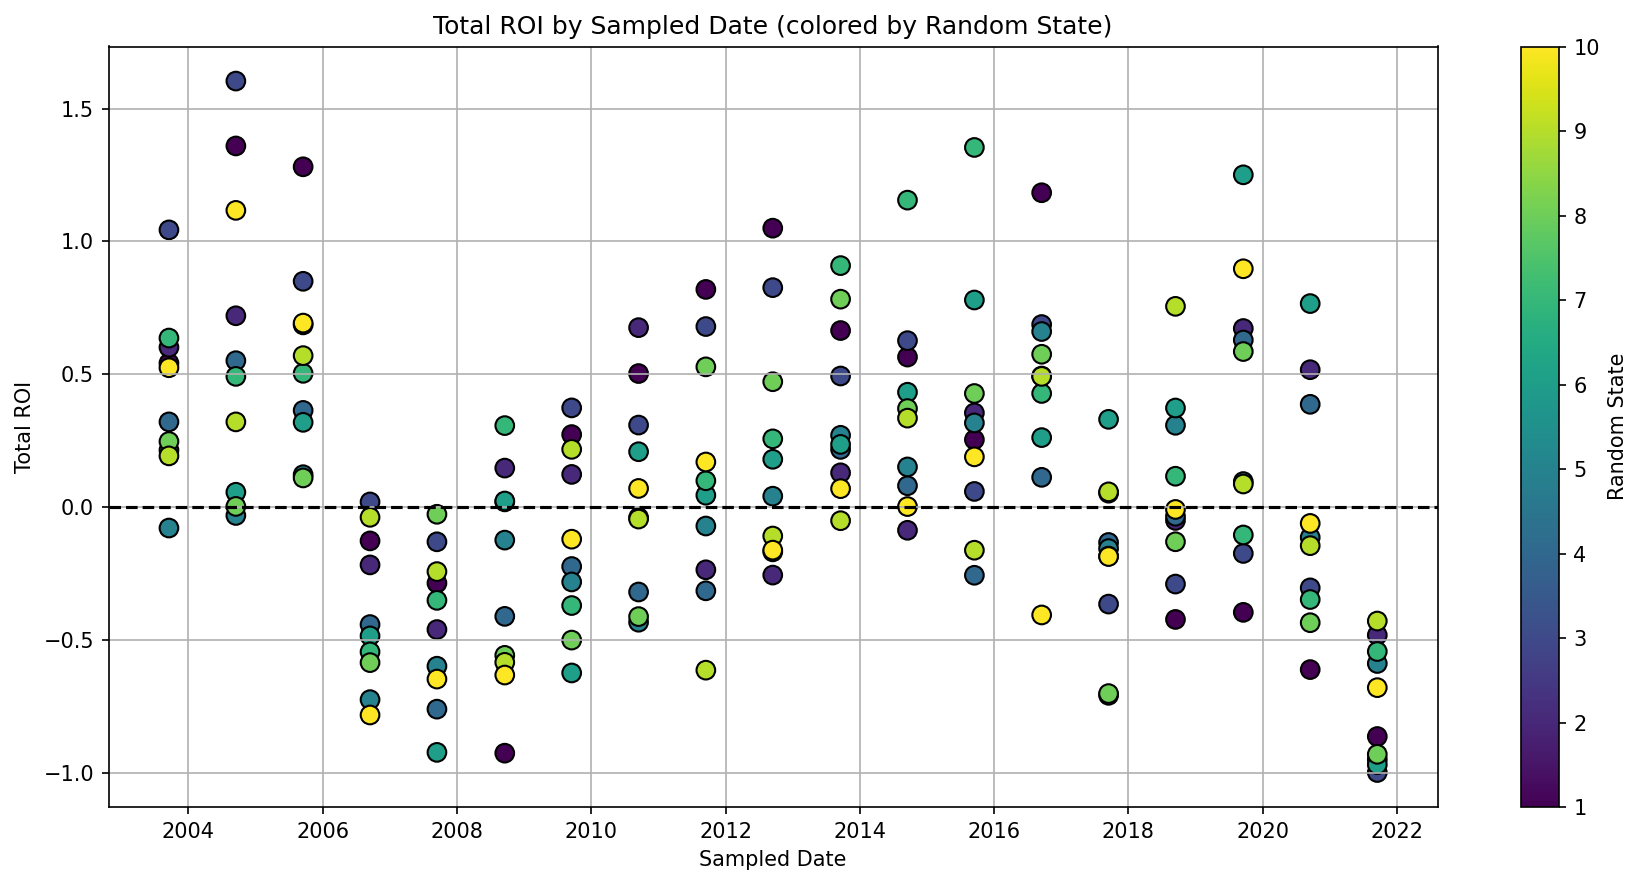

In [40]:
# If needed: ensure sampled_stock_returns_date is datetime
df_summary['sampled_stock_returns_date'] = pd.to_datetime(df_summary['sampled_stock_returns_date'])

# Create the scatter plot
plt.figure(figsize=(12, 6), dpi=150)

# Scatter: x = date, y = total_roi, color by random_state
scatter = plt.scatter(
    df_summary['sampled_stock_returns_date'],
    df_summary['total_roi'],
    c=df_summary['sampled_stock_returns_random_state'],
    cmap='viridis',
    s=80,
    edgecolors='black'
)

plt.axhline(y=0.0, color='black', linestyle='--', label='Break-even ROI')
plt.title('Total ROI by Sampled Date (colored by Random State)')
plt.xlabel('Sampled Date')
plt.ylabel('Total ROI')
plt.colorbar(scatter, label='Random State')
plt.grid(True)
plt.tight_layout()
plt.show()

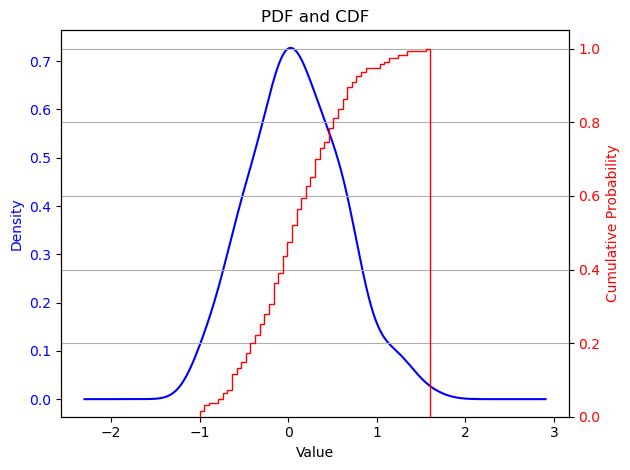

In [41]:
# Plot the PDF and CDF of the Portfolio ROI

df_total_roi = df_summary['total_roi'].copy(deep=True)

fig, ax1 = plt.subplots()

# Plot PDF on the first y-axis
df_total_roi.plot.density(ax=ax1, label='PDF (KDE)', color='blue')
ax1.set_xlabel('Value')
ax1.set_ylabel('Density', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for CDF
ax2 = ax1.twinx()
df_total_roi.hist(cumulative=True, density=True, bins=50, ax=ax2, label='CDF', histtype='step', color='red')
ax2.set_ylabel('Cumulative Probability', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('PDF and CDF')
fig.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()